In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
read = pd.read_csv('Titanic1.csv')

In [3]:
read.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,NaN,0.0,1.0,NaN,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,NaN,Male,468.0,109.0,577.0,NaN
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,Female,81.0,233.0,314.0,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN,NaN,NaN,NaN,NaN,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,NaN,NaN,NaN,NaN,NaN,NaN
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Unnamed: 12  0 non-null      float64
 13  Unnamed: 13  2 non-null      object 
 14  Unnamed: 14  3 non-null      float64
 15  Unnamed: 15  3 non-null      float64
 16  Unnamed: 16  2 non-null      float64
 17  Unnamed: 17  0 non-null      float64
dtypes: float64(7), int64(5), object(6)
memory usage: 1

In [12]:
read.shape

(891, 18)

In [3]:
pd.set_option("display.max_rows", 891)
pd.set_option("display.max_columns", 18)

In [13]:
read.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17'],
      dtype='object')

In [8]:
s = read["Survived"] == 1
ns = read["Survived"] == 0

In [9]:
read[s]["Fare"].describe()

count    342.000000
mean      48.395408
std       66.596998
min        0.000000
25%       12.475000
50%       26.000000
75%       57.000000
max      512.329200
Name: Fare, dtype: float64

In [10]:
read[ns]["Fare"].describe()

count    549.000000
mean      22.117887
std       31.388207
min        0.000000
25%        7.854200
50%       10.500000
75%       26.000000
max      263.000000
Name: Fare, dtype: float64

In [3]:
read["Survived_text"] = read.Survived.map({0: 'Not Survived', 1: 'Survived'})
sub = read[["PassengerId", "Survived", "Survived_text", "Sex", "Pclass", "Fare"]]
lim = sub.head(10)
lim

,PassengerId,Survived,Survived_text,Sex,Pclass,Fare
0,1,0,Not Survived,male,3,7.2500
1,2,1,Survived,female,1,71.2833
2,3,1,Survived,female,3,7.9250
3,4,1,Survived,female,1,53.1000
4,5,0,Not Survived,male,3,8.0500
5,6,0,Not Survived,male,3,8.4583
6,7,0,Not Survived,male,1,51.8625
7,8,0,Not Survived,male,3,21.0750
8,9,1,Survived,female,3,11.1333
9,10,1,Survived,female,2,30.0708


Text(0.5, 1.0, 'Boxplot of Fare Categorize by Survival')

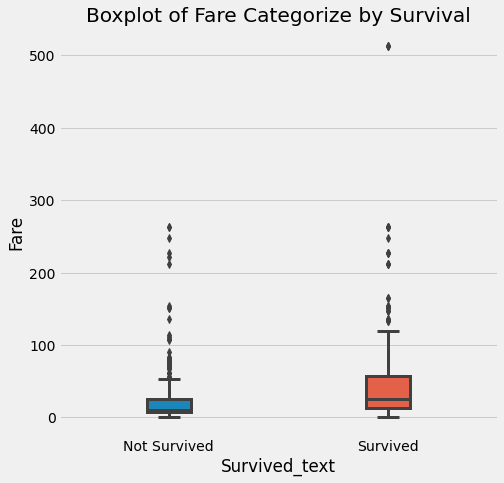

In [4]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (7,7))
sns.boxplot(x = sub["Survived_text"], y = sub["Fare"],width = 0.2,linewidth = 3).set_title("Boxplot of Fare Categorize by Survival")

Text(0.5, 1.0, 'Boxplot of Fare Categorize by Sex')

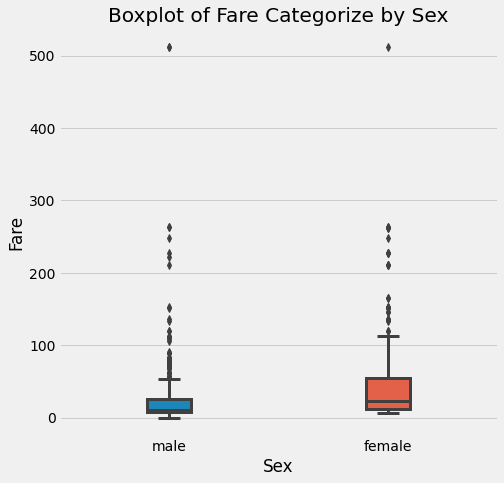

In [5]:
plt.figure(figsize = (7,7))
sns.boxplot(x = sub["Sex"], y = sub["Fare"],width = 0.2,linewidth = 3).set_title("Boxplot of Fare Categorize by Sex")

Text(0.5, 1.0, 'Boxplot of Fare Categorize by Pclass')

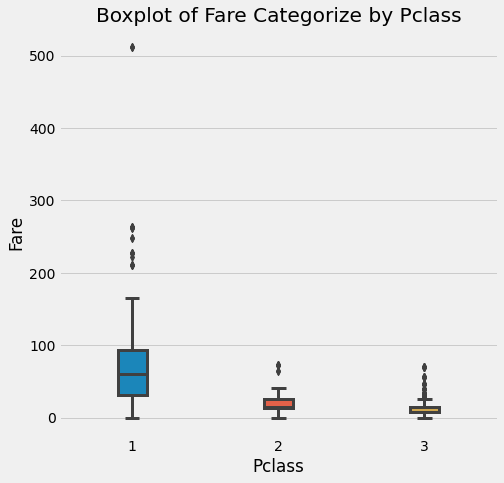

In [6]:
plt.figure(figsize = (7,7))
sns.boxplot(x = sub["Pclass"], y = sub["Fare"],width = 0.2,linewidth = 3).set_title("Boxplot of Fare Categorize by Pclass")

Text(0.5, 1.0, 'Side-by-Side Boxplot of Fare Categorize by Pclass and Survival')

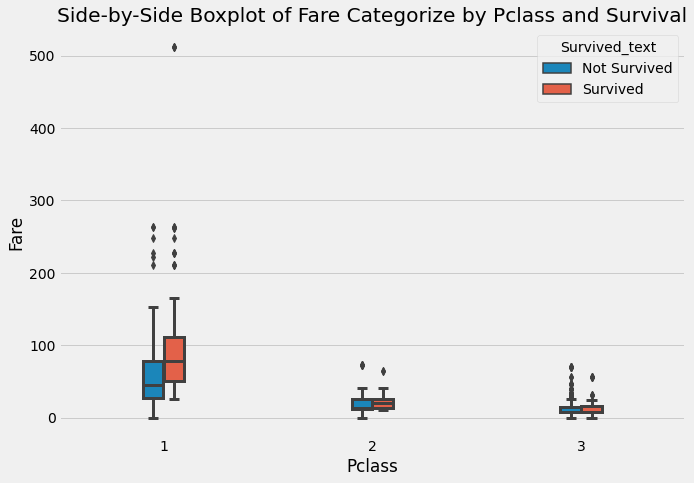

In [7]:
plt.figure(figsize = (10,7))
sns.boxplot(x = sub["Pclass"], y = sub["Fare"],width = 0.2,linewidth = 3, hue = sub["Survived_text"]).set_title("Side-by-Side Boxplot of Fare Categorize by Pclass and Survival")

Text(0.5, 1.0, 'Side-by-Side Boxplot of Fare Categorize by Pclass and Sex')

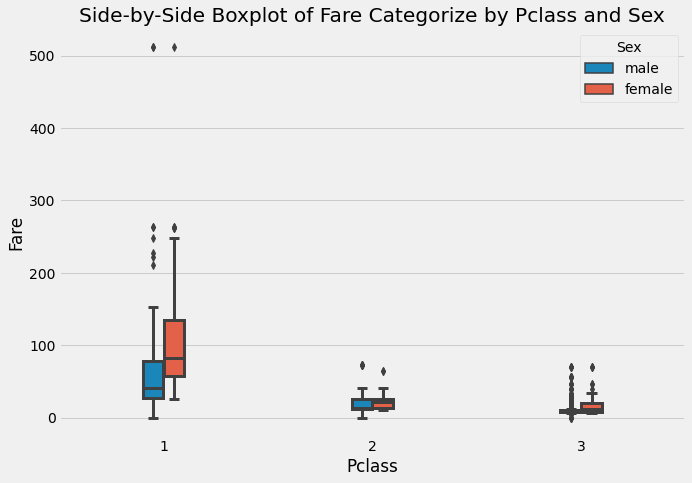

In [8]:
plt.figure(figsize = (10,7))
sns.boxplot(x = sub["Pclass"], y = sub["Fare"],width = 0.2,linewidth = 3, hue = sub["Sex"]).set_title("Side-by-Side Boxplot of Fare Categorize by Pclass and Sex")

In [5]:
sex_grp = read.groupby("Sex")
male = sex_grp.get_group("male").loc[s,"Survived"].count()
nmale = sex_grp.get_group("male").loc[ns,"Survived"].count()
female = sex_grp.get_group("female").loc[s,"Survived"].count()
nfemale = sex_grp.get_group("female").loc[ns,"Survived"].count()
print("Male that Survived:",male)
print("Female that Survived:", female)
print("Male that Not Survived:",nmale,)
print("Female that Not Survived:", nfemale)
print("Total: ",male + nmale, female + nfemale)


Male that Survived: 109
Female that Survived: 233
Male that Not Survived: 468
Female that Not Survived: 81
Total:  577 314


<AxesSubplot:title={'center':'Survival Based on Sex'}, xlabel='Sex', ylabel='Survival Counts'>

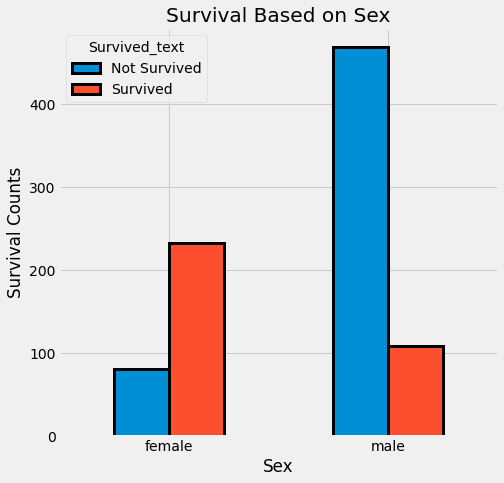

In [7]:
cross = pd.crosstab(sub["Sex"], sub["Survived_text"])
cross.plot(kind = 'bar', figsize = (7,7),title = "Survival Based on Sex", rot = 0, xlabel = "Sex", ylabel = "Survival Counts", edgecolor = "black", lw = 3)

In [10]:
cross2 = pd.crosstab(sub["Survived_text"], sub["Sex"])
cross2

Sex,female,male
Survived_text,,
Not Survived,81,468
Survived,233,109


In [11]:
sum_female = np.sum(cross2.female)
sum_male = np.sum(cross2.male)

cross2["Pct_female"] = cross2["female"].apply(lambda x: x/sum_female).round(decimals = 2)
cross2["Pct_male"] = cross2["male"].apply(lambda x: x/sum_male).round(decimals = 2)
cross2

Sex,female,male,Pct_female,Pct_male
Survived_text,,,,
Not Survived,81,468,0.26,0.81
Survived,233,109,0.74,0.19


<AxesSubplot:title={'center':'Side-by-Side Bar Chart of Survival Percentage Based on Sex'}, xlabel='Survival', ylabel='Percentage'>

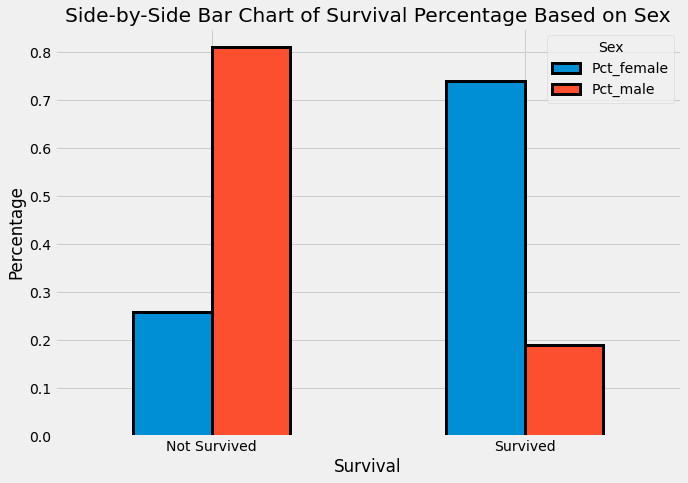

In [12]:
cross2[["Pct_female","Pct_male"]].plot(kind = 'bar', figsize = (10,7), rot = 0, edgecolor = 'black', lw = 3, 
                                       xlabel = "Survival", ylabel = 'Percentage', title = 'Side-by-Side Bar Chart of Survival Percentage Based on Sex')

In [64]:
cross3 = pd.crosstab(sub["Pclass"], sub["Survived_text"])
cross3

Survived_text,Not Survived,Survived
Pclass,,
1,80,136
2,97,87
3,372,119


In [66]:
S = np.sum(cross3["Survived"])
NS = np.sum(cross3["Not Survived"])

cross3["Survived_pct"] = cross3["Survived"].apply(lambda x: x/S).round(decimals = 2)
cross3["Not_Survived_pct"] = cross3["Not Survived"].apply(lambda x: x/NS).round(decimals = 2)

cross3

Survived_text,Not Survived,Survived,Survived_pct,Not_Survived_pct
Pclass,,,,
1,80,136,0.40,0.15
2,97,87,0.25,0.18
3,372,119,0.35,0.68


<AxesSubplot:title={'center':'Side-by-Side Percentage Bar Chart of Pclass and Survival'}, xlabel='Pclass', ylabel='Percentage'>

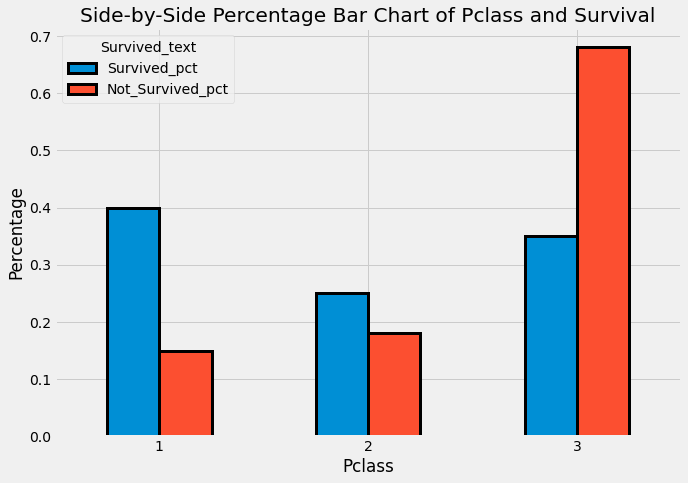

In [73]:
cross3[["Survived_pct", "Not_Survived_pct"]].plot(kind = 'bar', rot = 0, figsize = (10,7), edgecolor = 'black', lw = 3, title = "Side-by-Side Percentage Bar Chart of Pclass and Survival",
                                                 ylabel = "Percentage")